In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
class Model():
    def __init__(self):
        self.reward_map = -np.ones((4,4))
        self.reward_map[([0,0,0,2,2,2],[1,2,3,0,1,2])] = -10
        self.V = np.zeros(self.reward_map.shape)
        self.gamma = 1
        self.epsilon = .001
        self.policy = np.zeros((4,4,4))
        self.policy[:,:] = [.25,.25,.25,.25]
        
        self.actions = np.array([[-1,0],[+1,0],[0,1],[0,-1]])
        #print(self.reward_map)
        
    def updateV(self):
        
        while True:
            V_update = np.zeros(self.reward_map.shape)

            

            for i in range(self.reward_map.shape[0]):
                for j in range(self.reward_map.shape[1]):

                    state = [i,j]

                    #print(state)

                    if state != [0,0] :    
                        # V update
                        for a,action_prob in zip(self.actions,self.policy[tuple(state)]):
                            next_state = [state[0]+a[0],state[1]+a[1]]

                            next_state[0] = state[0] if next_state[0] == -1 else next_state[0]
                            next_state[1] = state[1] if next_state[1] == -1 else next_state[1]
                            next_state[0] = state[0] if next_state[0] == 4 else next_state[0]
                            next_state[1] = state[1] if next_state[1] == 4 else next_state[1]

                            #print(next_state)
                            #print(f"{action_prob}*({self.reward_map[tuple(next_state)]} + {self.gamma} * {self.V[next_state]})")
                            V_update[tuple(state)] += action_prob*(self.reward_map[tuple(next_state)] + self.gamma * self.V[tuple(next_state)])
            
            err = np.max(np.absolute(V_update-self.V))
            self.V = V_update

            if err < self.epsilon:
                print(V_update)
                break

                
            
    def plot(self):
        fig, axs = plt.subplots(1,3)
        
        fig.set_size_inches(19,5)
        axs[0].pcolor(-self.V[::-1],cmap="YlGn")
        for y in range(self.V.shape[0]):
            for x in range(self.V.shape[1]):
                axs[0].text(x + 0.5, y + 0.5, '%.1f' % self.V[::-1][y, x],
                         horizontalalignment='center',
                         verticalalignment='center',
                         color = "y"
                         )
        
        
        axs[1].imshow(-self.V,cmap="YlGn")
        for i in range(self.policy.shape[0]):
            for j in range(self.policy.shape[1]):
                #print(f"State:{(i,j)}")
                #print(self.policy[i,j])
                #print("*"*50)
                for action in np.argwhere(self.policy[j,i] > np.max(self.policy[j,i])-.1):
                    if action[0] == 3:
                        axs[1].arrow(i, j, -.3, 0, width = 0.05,color="y")
                    if action[0] == 2:
                        axs[1].arrow(i, j, .3, 0, width = 0.05,color="y")
                    if action[0] == 1:
                        axs[1].arrow(i, j, 0, +.3, width = 0.05,color="y")
                    if action[0] == 0:
                        axs[1].arrow(i, j, 0, -.3, width = 0.05,color="y")
        axs[2].imshow(self.reward_map)
        
        plt.show()
                        
    def update_policy(self):
        for i in range(self.policy.shape[0]):
            for j in range(self.policy.shape[1]):

                state = [i,j]

                #print(state)

                if state != [0,0]:    
                   
                    q = []
                    for a in self.actions:
                        next_state = [state[0]+a[0],state[1]+a[1]]
                        next_state[0] = state[0] if next_state[0] == -1 else next_state[0]
                        next_state[1] = state[1] if next_state[1] == -1 else next_state[1]
                        next_state[0] = state[0] if next_state[0] == 4 else next_state[0]
                        next_state[1] = state[1] if next_state[1] == 4 else next_state[1]
                        q.append(self.V[tuple(next_state)])
                    
                    q = np.array(q)
                    print(f"State: {(i,j)}")
                    print(q)
                    best_actions = np.argwhere(q >= np.max(q) -.1).flatten()
                    
                    print(best_actions)
                    
                    self.policy[tuple(state)] = 0
                    self.policy[tuple(state)][best_actions] = 1/len(best_actions)
                    
                    print(self.policy[tuple(state)])

In [93]:
#[[-1,0],[+1,0],[0,1],[0,-1]]


#["ariba","abajo","derecha","izquierda"]
#ab
#d
#i

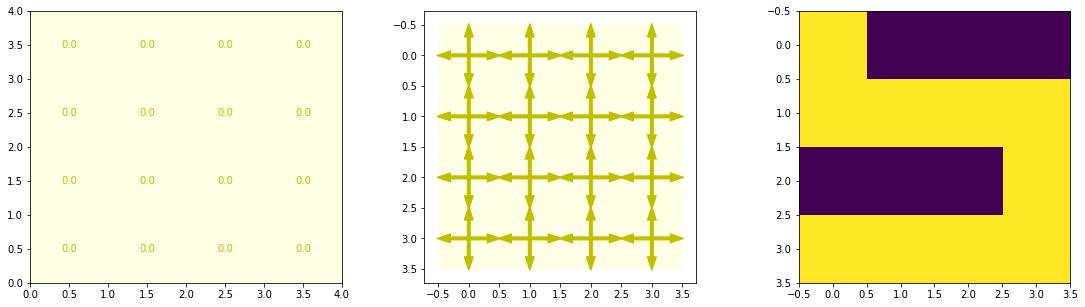

[[   0.         -137.49454985 -209.5177201  -239.38702892]
 [-129.45883556 -180.96777634 -220.67442241 -238.25962963]
 [-194.41057724 -214.24585098 -231.9557224  -241.72091954]
 [-217.52988607 -227.65248677 -238.18520525 -241.95112598]]


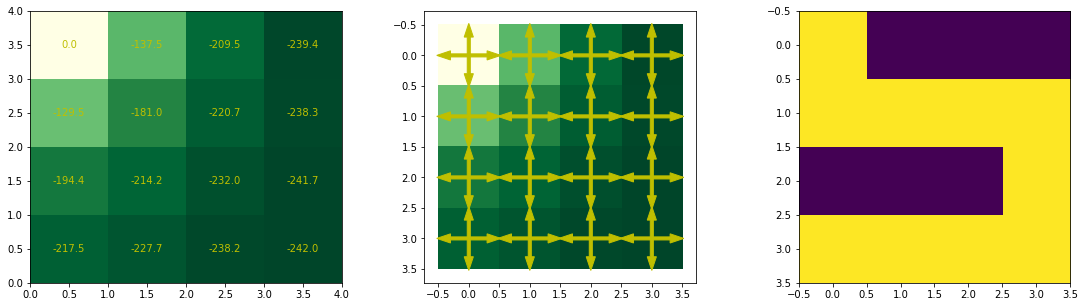

State: (0, 1)
[-137.49454985 -180.96777634 -209.5177201     0.        ]
[3]
[0. 0. 0. 1.]
State: (0, 2)
[-209.5177201  -220.67442241 -239.38702892 -137.49454985]
[3]
[0. 0. 0. 1.]
State: (0, 3)
[-239.38702892 -238.25962963 -239.38702892 -209.5177201 ]
[3]
[0. 0. 0. 1.]
State: (1, 0)
[   0.         -194.41057724 -180.96777634 -129.45883556]
[0]
[1. 0. 0. 0.]
State: (1, 1)
[-137.49454985 -214.24585098 -220.67442241 -129.45883556]
[3]
[0. 0. 0. 1.]
State: (1, 2)
[-209.5177201  -231.9557224  -238.25962963 -180.96777634]
[3]
[0. 0. 0. 1.]
State: (1, 3)
[-239.38702892 -241.72091954 -238.25962963 -220.67442241]
[3]
[0. 0. 0. 1.]
State: (2, 0)
[-129.45883556 -217.52988607 -214.24585098 -194.41057724]
[0]
[1. 0. 0. 0.]
State: (2, 1)
[-180.96777634 -227.65248677 -231.9557224  -194.41057724]
[0]
[1. 0. 0. 0.]
State: (2, 2)
[-220.67442241 -238.18520525 -241.72091954 -214.24585098]
[3]
[0. 0. 0. 1.]
State: (2, 3)
[-238.25962963 -241.95112598 -241.72091954 -231.9557224 ]
[3]
[0. 0. 0. 1.]
State: (3,

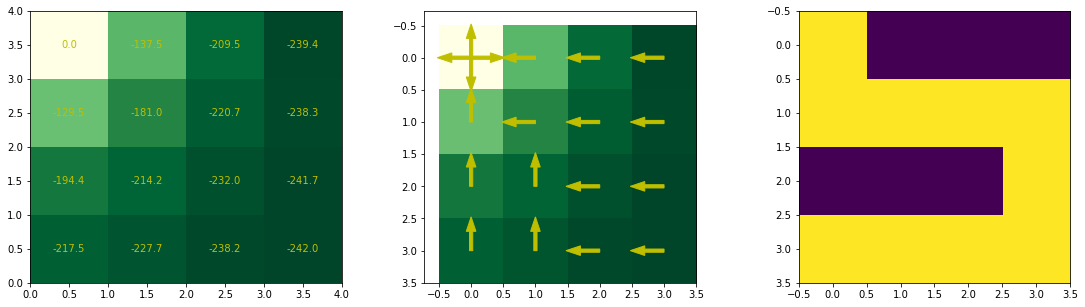

[[[0.25 0.25 0.25 0.25]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]]

 [[1.   0.   0.   0.  ]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]]

 [[1.   0.   0.   0.  ]
  [1.   0.   0.   0.  ]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]]

 [[1.   0.   0.   0.  ]
  [1.   0.   0.   0.  ]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]]]
//////////////////////////////////////////////////
[[  0.  -1. -11. -21.]
 [ -1.  -2.  -3.  -4.]
 [ -2.  -3. -13. -23.]
 [-12. -13. -14. -15.]]


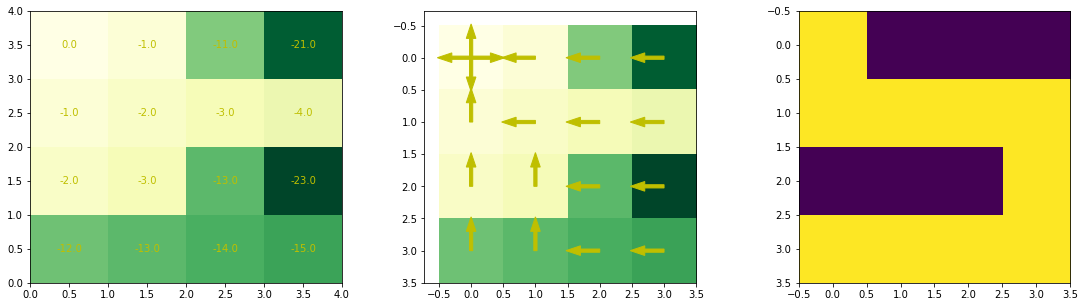

State: (0, 1)
[ -1.  -2. -11.   0.]
[3]
[0. 0. 0. 1.]
State: (0, 2)
[-11.  -3. -21.  -1.]
[3]
[0. 0. 0. 1.]
State: (0, 3)
[-21.  -4. -21. -11.]
[1]
[0. 1. 0. 0.]
State: (1, 0)
[ 0. -2. -2. -1.]
[0]
[1. 0. 0. 0.]
State: (1, 1)
[-1. -3. -3. -1.]
[0 3]
[0.5 0.  0.  0.5]
State: (1, 2)
[-11. -13.  -4.  -2.]
[3]
[0. 0. 0. 1.]
State: (1, 3)
[-21. -23.  -4.  -3.]
[3]
[0. 0. 0. 1.]
State: (2, 0)
[ -1. -12.  -3.  -2.]
[0]
[1. 0. 0. 0.]
State: (2, 1)
[ -2. -13. -13.  -2.]
[0 3]
[0.5 0.  0.  0.5]
State: (2, 2)
[ -3. -14. -23.  -3.]
[0 3]
[0.5 0.  0.  0.5]
State: (2, 3)
[ -4. -15. -23. -13.]
[0]
[1. 0. 0. 0.]
State: (3, 0)
[ -2. -12. -13. -12.]
[0]
[1. 0. 0. 0.]
State: (3, 1)
[ -3. -13. -14. -12.]
[0]
[1. 0. 0. 0.]
State: (3, 2)
[-13. -14. -15. -13.]
[0 3]
[0.5 0.  0.  0.5]
State: (3, 3)
[-23. -15. -15. -14.]
[3]
[0. 0. 0. 1.]


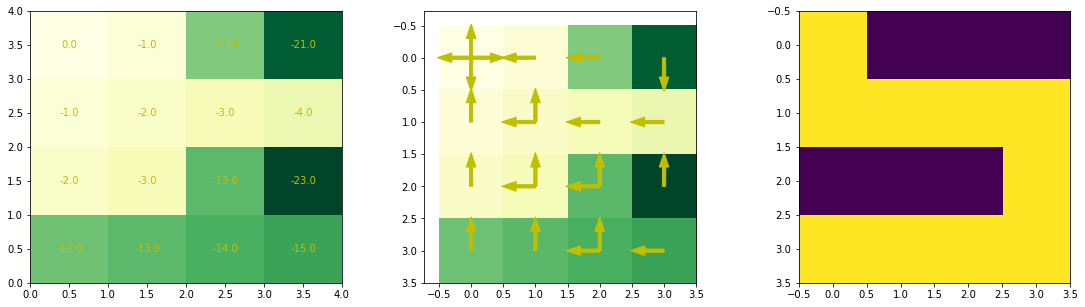

[[[0.25 0.25 0.25 0.25]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]
  [0.   1.   0.   0.  ]]

 [[1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]]

 [[1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]
  [0.5  0.   0.   0.5 ]
  [1.   0.   0.   0.  ]]

 [[1.   0.   0.   0.  ]
  [1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]
  [0.   0.   0.   1.  ]]]
//////////////////////////////////////////////////
[[  0.      -1.     -11.      -9.5   ]
 [ -1.      -6.5     -7.5     -8.5   ]
 [ -2.      -9.75   -14.125   -9.5   ]
 [-12.     -19.75   -22.4375 -23.4375]]


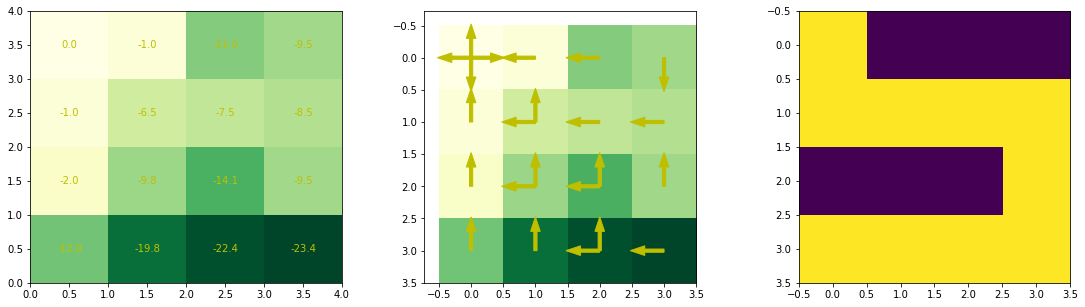

State: (0, 1)
[ -1.   -6.5 -11.    0. ]
[3]
[0. 0. 0. 1.]
State: (0, 2)
[-11.   -7.5  -9.5  -1. ]
[3]
[0. 0. 0. 1.]
State: (0, 3)
[ -9.5  -8.5  -9.5 -11. ]
[1]
[0. 1. 0. 0.]
State: (1, 0)
[ 0.  -2.  -6.5 -1. ]
[0]
[1. 0. 0. 0.]
State: (1, 1)
[-1.   -9.75 -7.5  -1.  ]
[0 3]
[0.5 0.  0.  0.5]
State: (1, 2)
[-11.    -14.125  -8.5    -6.5  ]
[3]
[0. 0. 0. 1.]
State: (1, 3)
[-9.5 -9.5 -8.5 -7.5]
[3]
[0. 0. 0. 1.]
State: (2, 0)
[ -1.   -12.    -9.75  -2.  ]
[0]
[1. 0. 0. 0.]
State: (2, 1)
[ -6.5   -19.75  -14.125  -2.   ]
[3]
[0. 0. 0. 1.]
State: (2, 2)
[ -7.5    -22.4375  -9.5     -9.75  ]
[0]
[1. 0. 0. 0.]
State: (2, 3)
[ -8.5    -23.4375  -9.5    -14.125 ]
[0]
[1. 0. 0. 0.]
State: (3, 0)
[ -2.   -12.   -19.75 -12.  ]
[0]
[1. 0. 0. 0.]
State: (3, 1)
[ -9.75   -19.75   -22.4375 -12.    ]
[0]
[1. 0. 0. 0.]
State: (3, 2)
[-14.125  -22.4375 -23.4375 -19.75  ]
[0]
[1. 0. 0. 0.]
State: (3, 3)
[ -9.5    -23.4375 -23.4375 -22.4375]
[0]
[1. 0. 0. 0.]


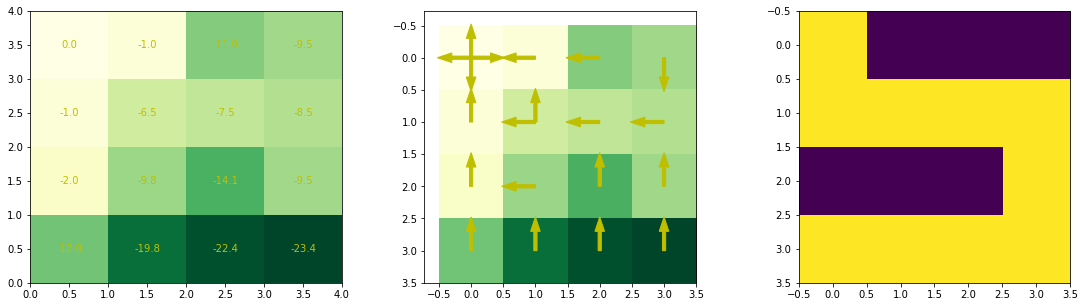

[[[0.25 0.25 0.25 0.25]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]
  [0.   1.   0.   0.  ]]

 [[1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]]

 [[1.   0.   0.   0.  ]
  [0.   0.   0.   1.  ]
  [1.   0.   0.   0.  ]
  [1.   0.   0.   0.  ]]

 [[1.   0.   0.   0.  ]
  [1.   0.   0.   0.  ]
  [1.   0.   0.   0.  ]
  [1.   0.   0.   0.  ]]]
//////////////////////////////////////////////////
[[  0.   -1.  -11.   -9.5]
 [ -1.   -6.5  -7.5  -8.5]
 [ -2.  -12.   -8.5  -9.5]
 [-12.  -22.  -18.5 -10.5]]


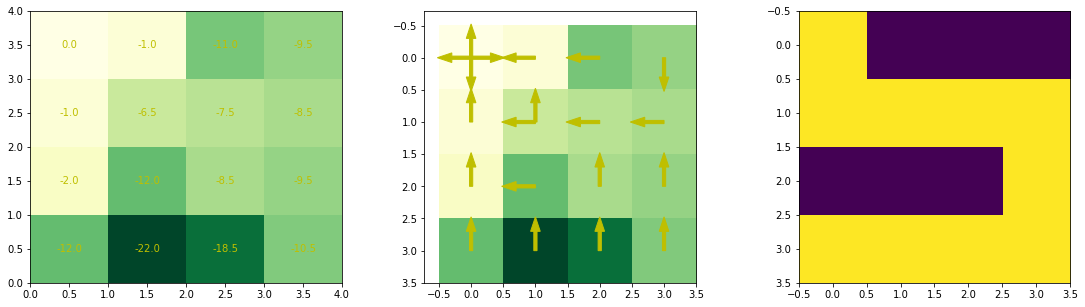

State: (0, 1)
[ -1.   -6.5 -11.    0. ]
[3]
[0. 0. 0. 1.]
State: (0, 2)
[-11.   -7.5  -9.5  -1. ]
[3]
[0. 0. 0. 1.]
State: (0, 3)
[ -9.5  -8.5  -9.5 -11. ]
[1]
[0. 1. 0. 0.]
State: (1, 0)
[ 0.  -2.  -6.5 -1. ]
[0]
[1. 0. 0. 0.]
State: (1, 1)
[ -1.  -12.   -7.5  -1. ]
[0 3]
[0.5 0.  0.  0.5]
State: (1, 2)
[-11.   -8.5  -8.5  -6.5]
[3]
[0. 0. 0. 1.]
State: (1, 3)
[-9.5 -9.5 -8.5 -7.5]
[3]
[0. 0. 0. 1.]
State: (2, 0)
[ -1. -12. -12.  -2.]
[0]
[1. 0. 0. 0.]
State: (2, 1)
[ -6.5 -22.   -8.5  -2. ]
[3]
[0. 0. 0. 1.]
State: (2, 2)
[ -7.5 -18.5  -9.5 -12. ]
[0]
[1. 0. 0. 0.]
State: (2, 3)
[ -8.5 -10.5  -9.5  -8.5]
[0 3]
[0.5 0.  0.  0.5]
State: (3, 0)
[ -2. -12. -22. -12.]
[0]
[1. 0. 0. 0.]
State: (3, 1)
[-12.  -22.  -18.5 -12. ]
[0 3]
[0.5 0.  0.  0.5]
State: (3, 2)
[ -8.5 -18.5 -10.5 -22. ]
[0]
[1. 0. 0. 0.]
State: (3, 3)
[ -9.5 -10.5 -10.5 -18.5]
[0]
[1. 0. 0. 0.]


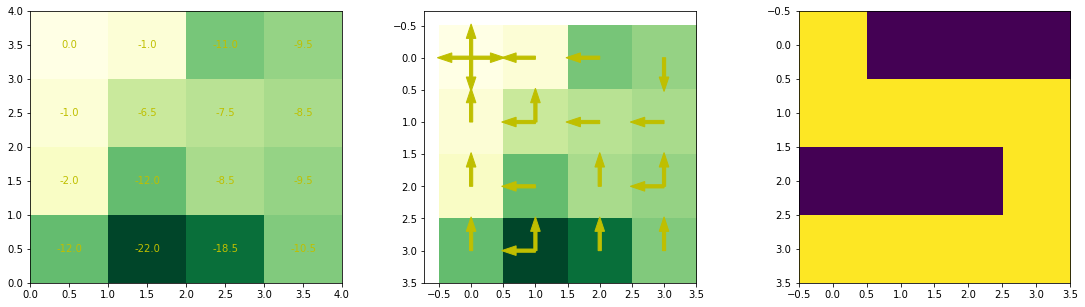

[[[0.25 0.25 0.25 0.25]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]
  [0.   1.   0.   0.  ]]

 [[1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]]

 [[1.   0.   0.   0.  ]
  [0.   0.   0.   1.  ]
  [1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]]

 [[1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]
  [1.   0.   0.   0.  ]
  [1.   0.   0.   0.  ]]]
//////////////////////////////////////////////////
[[  0.   -1.  -11.   -9.5]
 [ -1.   -6.5  -7.5  -8.5]
 [ -2.  -12.   -8.5 -14. ]
 [-12.  -17.5 -18.5 -15. ]]


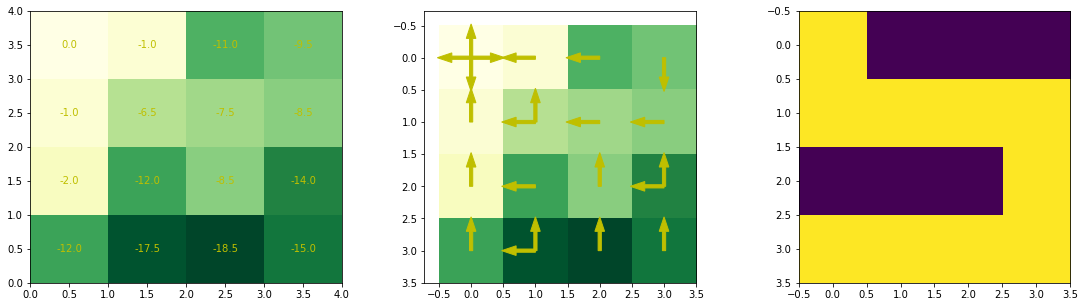

State: (0, 1)
[ -1.   -6.5 -11.    0. ]
[3]
[0. 0. 0. 1.]
State: (0, 2)
[-11.   -7.5  -9.5  -1. ]
[3]
[0. 0. 0. 1.]
State: (0, 3)
[ -9.5  -8.5  -9.5 -11. ]
[1]
[0. 1. 0. 0.]
State: (1, 0)
[ 0.  -2.  -6.5 -1. ]
[0]
[1. 0. 0. 0.]
State: (1, 1)
[ -1.  -12.   -7.5  -1. ]
[0 3]
[0.5 0.  0.  0.5]
State: (1, 2)
[-11.   -8.5  -8.5  -6.5]
[3]
[0. 0. 0. 1.]
State: (1, 3)
[ -9.5 -14.   -8.5  -7.5]
[3]
[0. 0. 0. 1.]
State: (2, 0)
[ -1. -12. -12.  -2.]
[0]
[1. 0. 0. 0.]
State: (2, 1)
[ -6.5 -17.5  -8.5  -2. ]
[3]
[0. 0. 0. 1.]
State: (2, 2)
[ -7.5 -18.5 -14.  -12. ]
[0]
[1. 0. 0. 0.]
State: (2, 3)
[ -8.5 -15.  -14.   -8.5]
[0 3]
[0.5 0.  0.  0.5]
State: (3, 0)
[ -2.  -12.  -17.5 -12. ]
[0]
[1. 0. 0. 0.]
State: (3, 1)
[-12.  -17.5 -18.5 -12. ]
[0 3]
[0.5 0.  0.  0.5]
State: (3, 2)
[ -8.5 -18.5 -15.  -17.5]
[0]
[1. 0. 0. 0.]
State: (3, 3)
[-14.  -15.  -15.  -18.5]
[0]
[1. 0. 0. 0.]


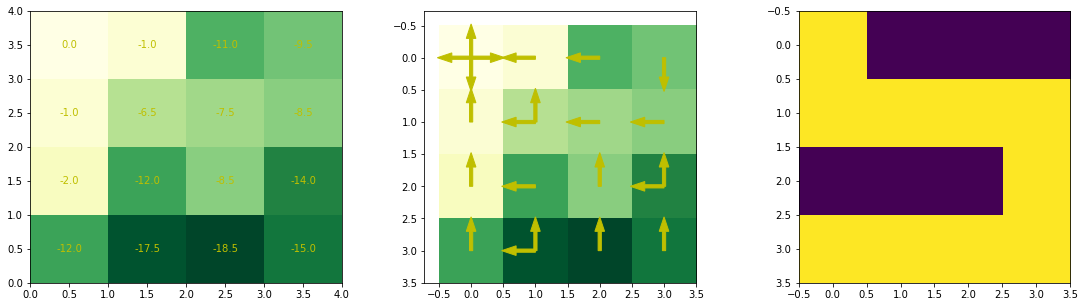

[[[0.25 0.25 0.25 0.25]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]
  [0.   1.   0.   0.  ]]

 [[1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]]

 [[1.   0.   0.   0.  ]
  [0.   0.   0.   1.  ]
  [1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]]

 [[1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]
  [1.   0.   0.   0.  ]
  [1.   0.   0.   0.  ]]]
//////////////////////////////////////////////////
[[  0.   -1.  -11.   -9.5]
 [ -1.   -6.5  -7.5  -8.5]
 [ -2.  -12.   -8.5 -14. ]
 [-12.  -17.5 -18.5 -15. ]]


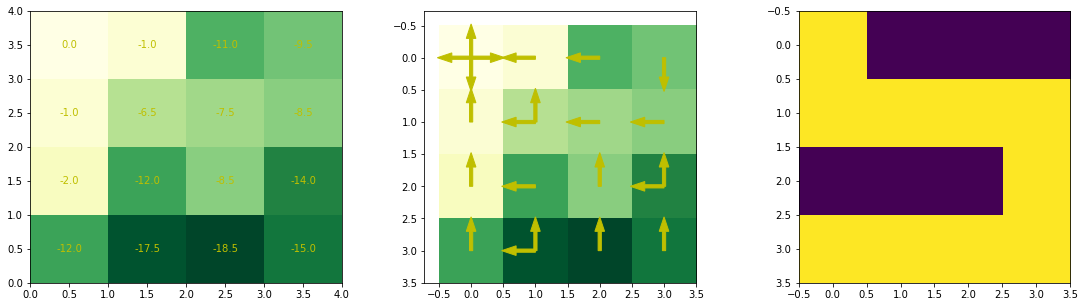

State: (0, 1)
[ -1.   -6.5 -11.    0. ]
[3]
[0. 0. 0. 1.]
State: (0, 2)
[-11.   -7.5  -9.5  -1. ]
[3]
[0. 0. 0. 1.]
State: (0, 3)
[ -9.5  -8.5  -9.5 -11. ]
[1]
[0. 1. 0. 0.]
State: (1, 0)
[ 0.  -2.  -6.5 -1. ]
[0]
[1. 0. 0. 0.]
State: (1, 1)
[ -1.  -12.   -7.5  -1. ]
[0 3]
[0.5 0.  0.  0.5]
State: (1, 2)
[-11.   -8.5  -8.5  -6.5]
[3]
[0. 0. 0. 1.]
State: (1, 3)
[ -9.5 -14.   -8.5  -7.5]
[3]
[0. 0. 0. 1.]
State: (2, 0)
[ -1. -12. -12.  -2.]
[0]
[1. 0. 0. 0.]
State: (2, 1)
[ -6.5 -17.5  -8.5  -2. ]
[3]
[0. 0. 0. 1.]
State: (2, 2)
[ -7.5 -18.5 -14.  -12. ]
[0]
[1. 0. 0. 0.]
State: (2, 3)
[ -8.5 -15.  -14.   -8.5]
[0 3]
[0.5 0.  0.  0.5]
State: (3, 0)
[ -2.  -12.  -17.5 -12. ]
[0]
[1. 0. 0. 0.]
State: (3, 1)
[-12.  -17.5 -18.5 -12. ]
[0 3]
[0.5 0.  0.  0.5]
State: (3, 2)
[ -8.5 -18.5 -15.  -17.5]
[0]
[1. 0. 0. 0.]
State: (3, 3)
[-14.  -15.  -15.  -18.5]
[0]
[1. 0. 0. 0.]


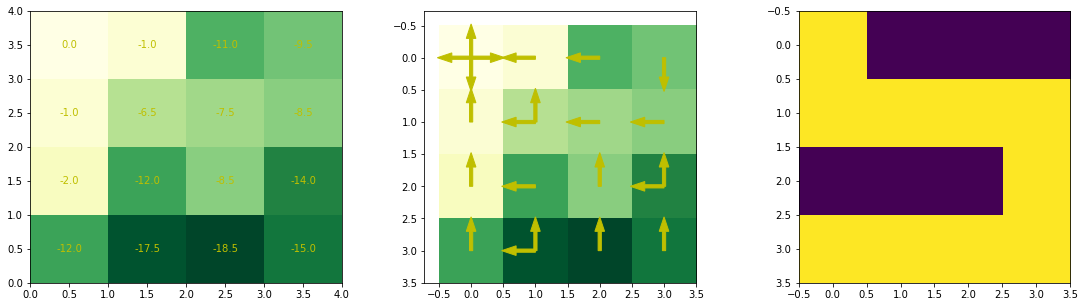

[[[0.25 0.25 0.25 0.25]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]
  [0.   1.   0.   0.  ]]

 [[1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]]

 [[1.   0.   0.   0.  ]
  [0.   0.   0.   1.  ]
  [1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]]

 [[1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]
  [1.   0.   0.   0.  ]
  [1.   0.   0.   0.  ]]]
//////////////////////////////////////////////////
[[  0.   -1.  -11.   -9.5]
 [ -1.   -6.5  -7.5  -8.5]
 [ -2.  -12.   -8.5 -14. ]
 [-12.  -17.5 -18.5 -15. ]]


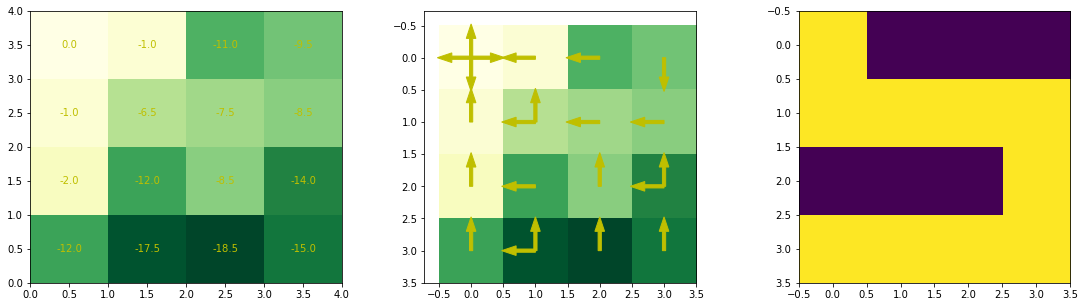

State: (0, 1)
[ -1.   -6.5 -11.    0. ]
[3]
[0. 0. 0. 1.]
State: (0, 2)
[-11.   -7.5  -9.5  -1. ]
[3]
[0. 0. 0. 1.]
State: (0, 3)
[ -9.5  -8.5  -9.5 -11. ]
[1]
[0. 1. 0. 0.]
State: (1, 0)
[ 0.  -2.  -6.5 -1. ]
[0]
[1. 0. 0. 0.]
State: (1, 1)
[ -1.  -12.   -7.5  -1. ]
[0 3]
[0.5 0.  0.  0.5]
State: (1, 2)
[-11.   -8.5  -8.5  -6.5]
[3]
[0. 0. 0. 1.]
State: (1, 3)
[ -9.5 -14.   -8.5  -7.5]
[3]
[0. 0. 0. 1.]
State: (2, 0)
[ -1. -12. -12.  -2.]
[0]
[1. 0. 0. 0.]
State: (2, 1)
[ -6.5 -17.5  -8.5  -2. ]
[3]
[0. 0. 0. 1.]
State: (2, 2)
[ -7.5 -18.5 -14.  -12. ]
[0]
[1. 0. 0. 0.]
State: (2, 3)
[ -8.5 -15.  -14.   -8.5]
[0 3]
[0.5 0.  0.  0.5]
State: (3, 0)
[ -2.  -12.  -17.5 -12. ]
[0]
[1. 0. 0. 0.]
State: (3, 1)
[-12.  -17.5 -18.5 -12. ]
[0 3]
[0.5 0.  0.  0.5]
State: (3, 2)
[ -8.5 -18.5 -15.  -17.5]
[0]
[1. 0. 0. 0.]
State: (3, 3)
[-14.  -15.  -15.  -18.5]
[0]
[1. 0. 0. 0.]


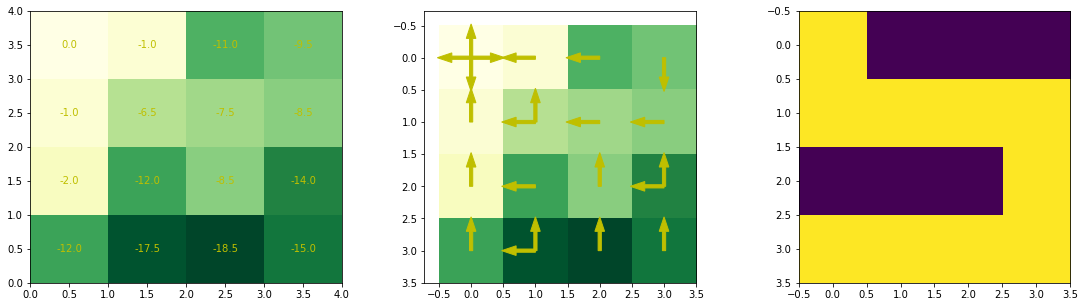

[[[0.25 0.25 0.25 0.25]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]
  [0.   1.   0.   0.  ]]

 [[1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]]

 [[1.   0.   0.   0.  ]
  [0.   0.   0.   1.  ]
  [1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]]

 [[1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]
  [1.   0.   0.   0.  ]
  [1.   0.   0.   0.  ]]]
//////////////////////////////////////////////////
[[  0.   -1.  -11.   -9.5]
 [ -1.   -6.5  -7.5  -8.5]
 [ -2.  -12.   -8.5 -14. ]
 [-12.  -17.5 -18.5 -15. ]]


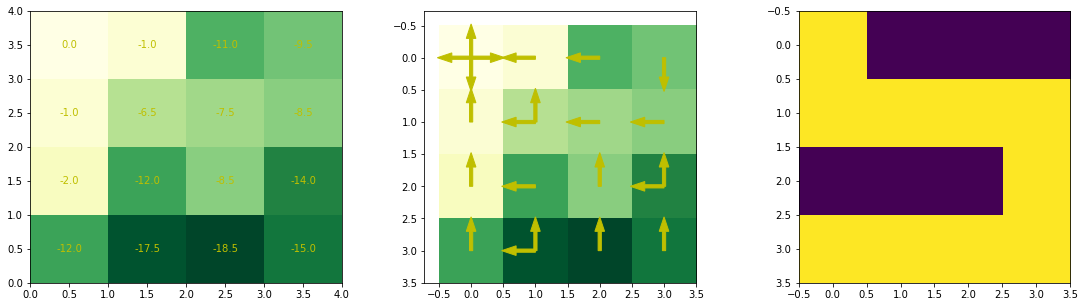

State: (0, 1)
[ -1.   -6.5 -11.    0. ]
[3]
[0. 0. 0. 1.]
State: (0, 2)
[-11.   -7.5  -9.5  -1. ]
[3]
[0. 0. 0. 1.]
State: (0, 3)
[ -9.5  -8.5  -9.5 -11. ]
[1]
[0. 1. 0. 0.]
State: (1, 0)
[ 0.  -2.  -6.5 -1. ]
[0]
[1. 0. 0. 0.]
State: (1, 1)
[ -1.  -12.   -7.5  -1. ]
[0 3]
[0.5 0.  0.  0.5]
State: (1, 2)
[-11.   -8.5  -8.5  -6.5]
[3]
[0. 0. 0. 1.]
State: (1, 3)
[ -9.5 -14.   -8.5  -7.5]
[3]
[0. 0. 0. 1.]
State: (2, 0)
[ -1. -12. -12.  -2.]
[0]
[1. 0. 0. 0.]
State: (2, 1)
[ -6.5 -17.5  -8.5  -2. ]
[3]
[0. 0. 0. 1.]
State: (2, 2)
[ -7.5 -18.5 -14.  -12. ]
[0]
[1. 0. 0. 0.]
State: (2, 3)
[ -8.5 -15.  -14.   -8.5]
[0 3]
[0.5 0.  0.  0.5]
State: (3, 0)
[ -2.  -12.  -17.5 -12. ]
[0]
[1. 0. 0. 0.]
State: (3, 1)
[-12.  -17.5 -18.5 -12. ]
[0 3]
[0.5 0.  0.  0.5]
State: (3, 2)
[ -8.5 -18.5 -15.  -17.5]
[0]
[1. 0. 0. 0.]
State: (3, 3)
[-14.  -15.  -15.  -18.5]
[0]
[1. 0. 0. 0.]


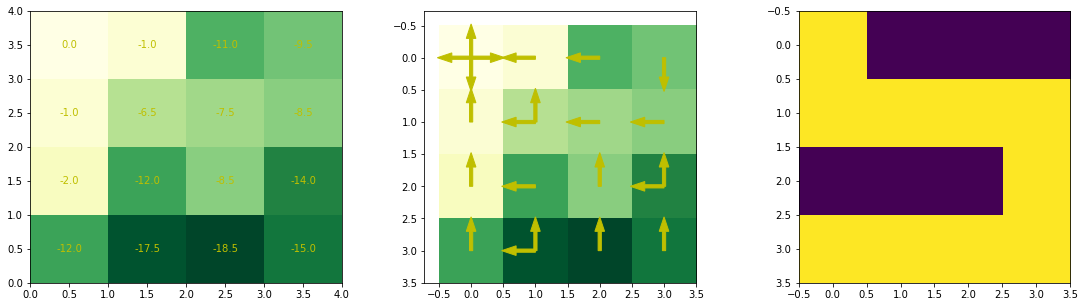

[[[0.25 0.25 0.25 0.25]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]
  [0.   1.   0.   0.  ]]

 [[1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]]

 [[1.   0.   0.   0.  ]
  [0.   0.   0.   1.  ]
  [1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]]

 [[1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]
  [1.   0.   0.   0.  ]
  [1.   0.   0.   0.  ]]]
//////////////////////////////////////////////////
[[  0.   -1.  -11.   -9.5]
 [ -1.   -6.5  -7.5  -8.5]
 [ -2.  -12.   -8.5 -14. ]
 [-12.  -17.5 -18.5 -15. ]]


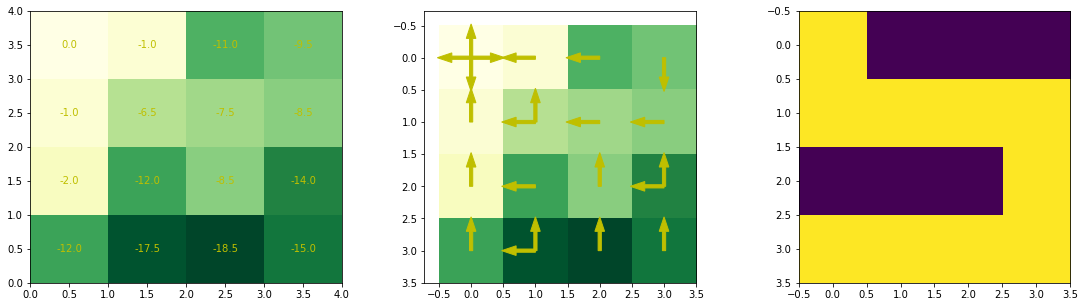

State: (0, 1)
[ -1.   -6.5 -11.    0. ]
[3]
[0. 0. 0. 1.]
State: (0, 2)
[-11.   -7.5  -9.5  -1. ]
[3]
[0. 0. 0. 1.]
State: (0, 3)
[ -9.5  -8.5  -9.5 -11. ]
[1]
[0. 1. 0. 0.]
State: (1, 0)
[ 0.  -2.  -6.5 -1. ]
[0]
[1. 0. 0. 0.]
State: (1, 1)
[ -1.  -12.   -7.5  -1. ]
[0 3]
[0.5 0.  0.  0.5]
State: (1, 2)
[-11.   -8.5  -8.5  -6.5]
[3]
[0. 0. 0. 1.]
State: (1, 3)
[ -9.5 -14.   -8.5  -7.5]
[3]
[0. 0. 0. 1.]
State: (2, 0)
[ -1. -12. -12.  -2.]
[0]
[1. 0. 0. 0.]
State: (2, 1)
[ -6.5 -17.5  -8.5  -2. ]
[3]
[0. 0. 0. 1.]
State: (2, 2)
[ -7.5 -18.5 -14.  -12. ]
[0]
[1. 0. 0. 0.]
State: (2, 3)
[ -8.5 -15.  -14.   -8.5]
[0 3]
[0.5 0.  0.  0.5]
State: (3, 0)
[ -2.  -12.  -17.5 -12. ]
[0]
[1. 0. 0. 0.]
State: (3, 1)
[-12.  -17.5 -18.5 -12. ]
[0 3]
[0.5 0.  0.  0.5]
State: (3, 2)
[ -8.5 -18.5 -15.  -17.5]
[0]
[1. 0. 0. 0.]
State: (3, 3)
[-14.  -15.  -15.  -18.5]
[0]
[1. 0. 0. 0.]


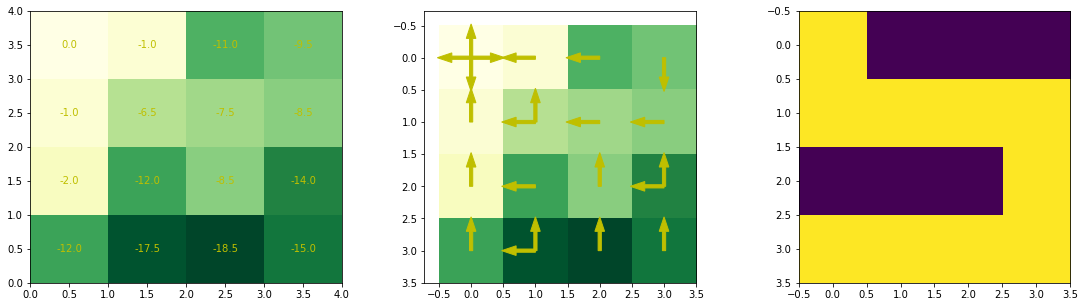

[[[0.25 0.25 0.25 0.25]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]
  [0.   1.   0.   0.  ]]

 [[1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]]

 [[1.   0.   0.   0.  ]
  [0.   0.   0.   1.  ]
  [1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]]

 [[1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]
  [1.   0.   0.   0.  ]
  [1.   0.   0.   0.  ]]]
//////////////////////////////////////////////////
[[  0.   -1.  -11.   -9.5]
 [ -1.   -6.5  -7.5  -8.5]
 [ -2.  -12.   -8.5 -14. ]
 [-12.  -17.5 -18.5 -15. ]]


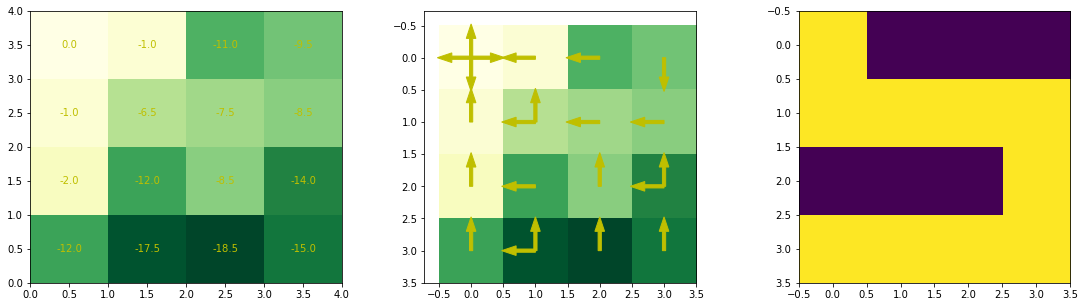

State: (0, 1)
[ -1.   -6.5 -11.    0. ]
[3]
[0. 0. 0. 1.]
State: (0, 2)
[-11.   -7.5  -9.5  -1. ]
[3]
[0. 0. 0. 1.]
State: (0, 3)
[ -9.5  -8.5  -9.5 -11. ]
[1]
[0. 1. 0. 0.]
State: (1, 0)
[ 0.  -2.  -6.5 -1. ]
[0]
[1. 0. 0. 0.]
State: (1, 1)
[ -1.  -12.   -7.5  -1. ]
[0 3]
[0.5 0.  0.  0.5]
State: (1, 2)
[-11.   -8.5  -8.5  -6.5]
[3]
[0. 0. 0. 1.]
State: (1, 3)
[ -9.5 -14.   -8.5  -7.5]
[3]
[0. 0. 0. 1.]
State: (2, 0)
[ -1. -12. -12.  -2.]
[0]
[1. 0. 0. 0.]
State: (2, 1)
[ -6.5 -17.5  -8.5  -2. ]
[3]
[0. 0. 0. 1.]
State: (2, 2)
[ -7.5 -18.5 -14.  -12. ]
[0]
[1. 0. 0. 0.]
State: (2, 3)
[ -8.5 -15.  -14.   -8.5]
[0 3]
[0.5 0.  0.  0.5]
State: (3, 0)
[ -2.  -12.  -17.5 -12. ]
[0]
[1. 0. 0. 0.]
State: (3, 1)
[-12.  -17.5 -18.5 -12. ]
[0 3]
[0.5 0.  0.  0.5]
State: (3, 2)
[ -8.5 -18.5 -15.  -17.5]
[0]
[1. 0. 0. 0.]
State: (3, 3)
[-14.  -15.  -15.  -18.5]
[0]
[1. 0. 0. 0.]


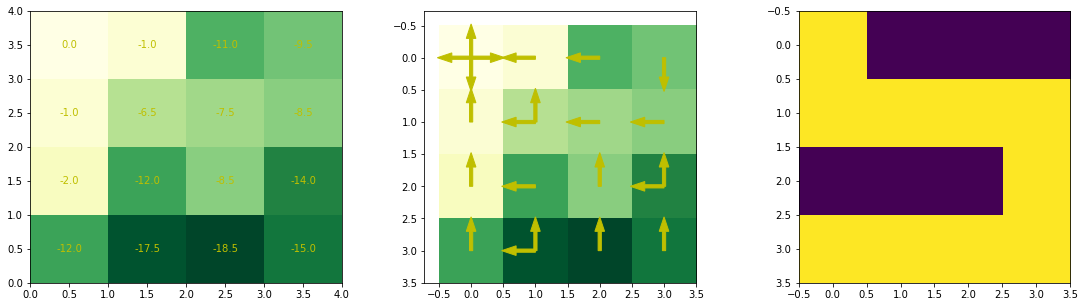

[[[0.25 0.25 0.25 0.25]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]
  [0.   1.   0.   0.  ]]

 [[1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]]

 [[1.   0.   0.   0.  ]
  [0.   0.   0.   1.  ]
  [1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]]

 [[1.   0.   0.   0.  ]
  [0.5  0.   0.   0.5 ]
  [1.   0.   0.   0.  ]
  [1.   0.   0.   0.  ]]]
//////////////////////////////////////////////////


In [94]:
model = Model()

model.plot()
for i in range(10):
    model.updateV()
    model.plot()
    model.update_policy()
    model.plot()
    print(model.policy)
    print("/"*50)


# np.ones((10,10))[([1,2,3],[1,2,3])]

## 